## 可视化第一课（matplotlib）练习

####  作业提交说明：
- 位置：作业文件统一放置于/0.Teacher/Exercise/Visualization1/下
- 文件名：请先复制该notebook文件，并重新命名为(课程名)+(您姓名的全拼)，并按要求完成后保存
- 时间：课程结束后的第二天前提交。
- 注意：请勿抄袭，移动，修改，删除其他同学和原始空白的练习文件。

In [2]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

## 练习1：航班乘客变化分析
* 从seaborn库中载入flights数据并查看表头

In [3]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


* 分析年度乘客总量变化情况（折线图）

In [4]:
type(data.groupby('year')[['passengers']].sum())

pandas.core.frame.DataFrame

In [5]:
type(data.groupby('year')['passengers'].sum())

pandas.core.series.Series

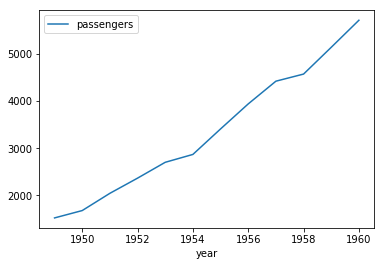

In [6]:
data.groupby('year')[['passengers']].sum().plot()

* 分析乘客在一年中各月份的分布（柱状图）

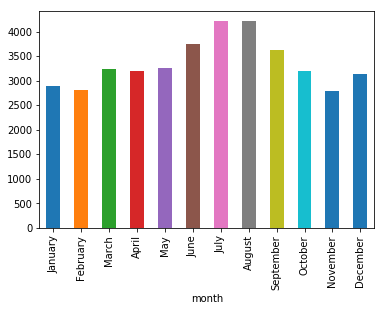

In [7]:
data.groupby('month')['passengers'].sum().plot(kind = 'bar')

## 练习2：鸢尾花花型尺寸分析

* 从seaborn库中载入flights数据并查看表头

In [8]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


* 萼片（sepal）和花瓣（petal）的大小关系（散点图）

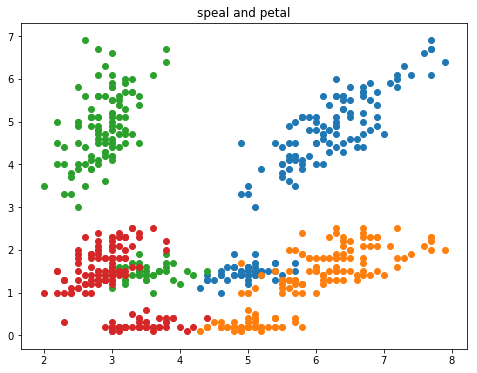

In [9]:
mpl.rc('figure',figsize = (8,6))
fig,axes = plt.subplots()
def speal_petal(data,axes,title):
    axes.scatter(data['sepal_length'], data['petal_length'])
    axes.scatter(data['sepal_length'], data['petal_width'])
    axes.scatter(data['sepal_width'], data['petal_length'])
    axes.scatter(data['sepal_width'], data['petal_width'])
    axes.set_title(title)
speal_petal(data,axes,'speal and petal')

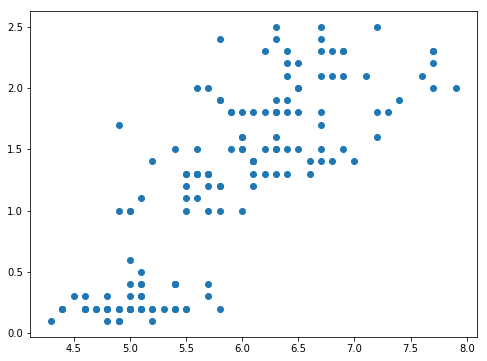

In [10]:
mpl.rc('figure',figsize = (8,6))
fig,axes = plt.subplots()
axes.scatter(data['sepal_length'], data['petal_width'])

* 不同种类（species）鸢尾花萼片和花瓣的大小关系（分类散点子图）

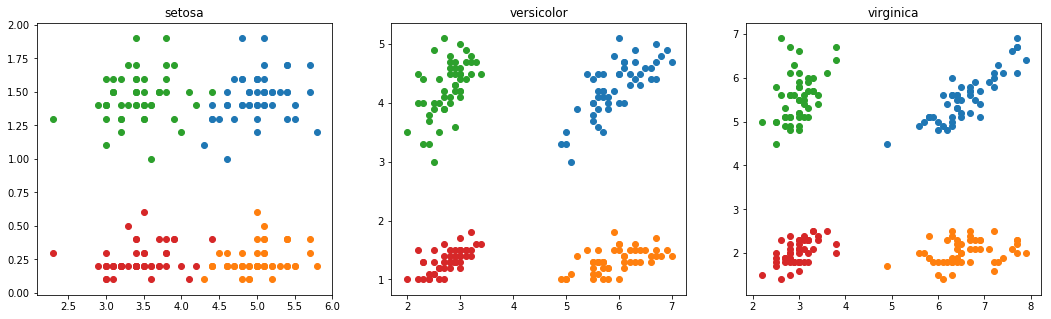

In [11]:
mpl.rc('figure', figsize=(18,5))
ax = []
fig, ax = plt.subplots(1,3)
species = data['species'].unique()
for i in range(len(species)):
    data_species = data.loc[data['species']==species[i],:]
    speal_petal(data_species,ax[i],species[i])
    

* 不同种类鸢尾花萼片和花瓣大小的分布情况（柱状图或者箱式图）

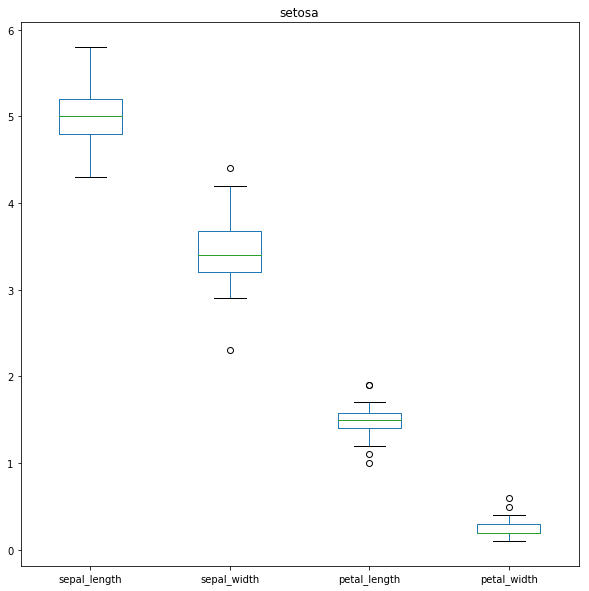

In [12]:
mpl.rc('figure', figsize=(10,10))
data.loc[data['species']=='setosa',:].plot.box(title='setosa')

In [13]:
type(data['species']=='setosa')

pandas.core.series.Series

## 练习3：餐厅小费情况分析


In [14]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


* 小费和总消费之间的关系（散点图）

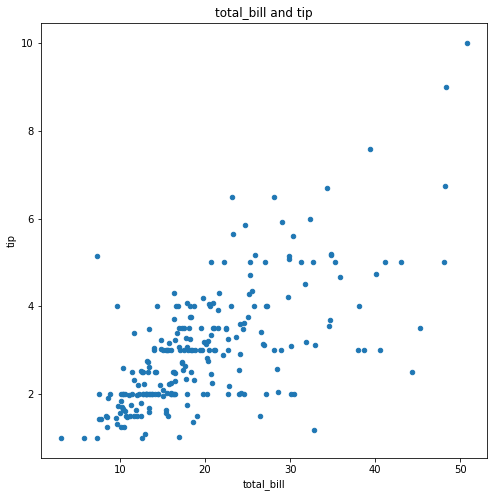

In [15]:
mpl.rc('figure',figsize=(8,8))
data.plot.scatter(x='total_bill', y='tip', title='total_bill and tip')

* 男性顾客和女性顾客，谁更慷慨（分类箱式图）

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


{'boxes': [<matplotlib.lines.Line2D at 0x1a1e9a2f28>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1e8ec470>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1e8da588>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a1e8da710>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1a1e8ec860>,
  <matplotlib.lines.Line2D at 0x1a1e8f02e8>]}

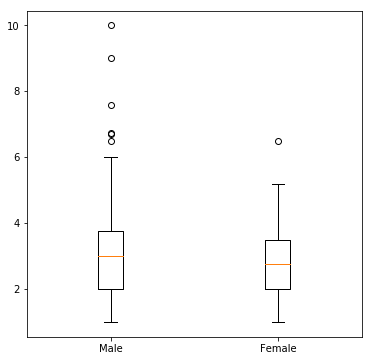

In [16]:
mpl.rc('figure', figsize=(6,6))
plt.boxplot([data.loc[data['sex'] == 'Male','tip'], data.loc[data.sex=='Female', 'tip']], labels = ['Male', 'Female'])

* 抽烟与否是否会对小费金额产生影响（分类箱式图）

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


{'boxes': [<matplotlib.lines.Line2D at 0x1a1f3e1c50>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1f3ea6a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1f3f2358>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a1f3eaef0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1a1f3e1da0>,
  <matplotlib.lines.Line2D at 0x1a1f3f2fd0>]}

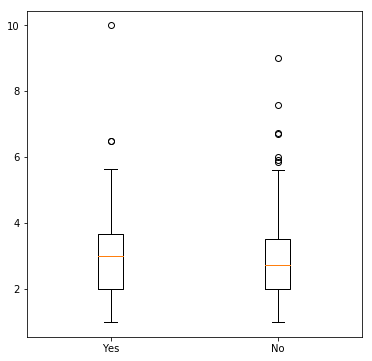

In [17]:
plt.boxplot([data.loc[data.smoker=='Yes', 'tip'], data.loc[data.smoker == 'No', 'tip']], labels = ['Yes','No'])


* 工作日和周末，什么时候顾客给的小费更慷慨（分类箱式图）

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


{'boxes': [<matplotlib.lines.Line2D at 0x1a1f453e48>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1f45b898>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1f462550>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a1f462128>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1a1f453f98>,
  <matplotlib.lines.Line2D at 0x1a1f46c208>]}

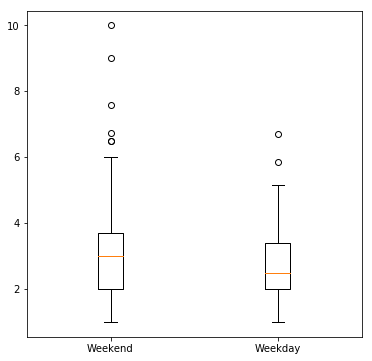

In [18]:
plt.boxplot([
    data.loc[(data.day=='Sun')| (data.day=='Sat'), 'tip'],
    data.loc[(data.day!='Sun')& (data.day!='Sat'), 'tip']
], labels = ['Weekend', 'Weekday'])

* 午饭和晚饭，哪一顿顾客更愿意给小费（分类箱式图）

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


{'boxes': [<matplotlib.lines.Line2D at 0x1a1f4c6470>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1f4c6e80>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1f4cbb38>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a1f4cb710>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1a1f4c65c0>,
  <matplotlib.lines.Line2D at 0x1a1f5597f0>]}

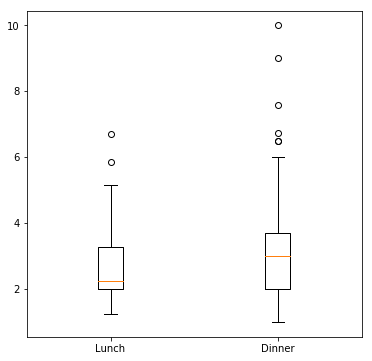

In [19]:
plt.boxplot([
    data.loc[data.time == 'Lunch', 'tip'],
    data.loc[data.time == 'Dinner', 'tip']
], labels = ['Lunch', 'Dinner'])

* 就餐人数是否会对慷慨度产生影响（分类箱式图）

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


{'boxes': [<matplotlib.lines.Line2D at 0x1a1f641048>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1f641a58>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1f64b710>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a1f64b2e8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1a1f641198>,
  <matplotlib.lines.Line2D at 0x1a1f68f9e8>]}

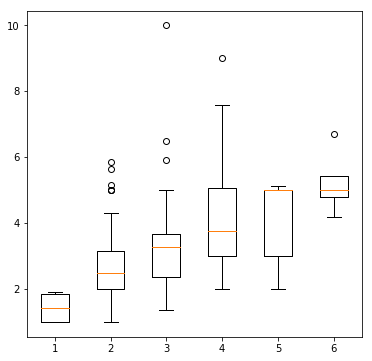

In [20]:
p_count = data['size'].unique()
p_count.sort()
p_count
d =[]
l =[]
for i in p_count:
    d.append(data.loc[data['size']==i, 'tip'])
    l.append(i)
plt.boxplot(d,labels=l)


* 性别+抽烟的组合因素对慷慨度的影响（分组柱状图）

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


{'boxes': [<matplotlib.lines.Line2D at 0x1a1f795128>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1f795b38>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1f788358>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a1f78fb70>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1a1f795278>,
  <matplotlib.lines.Line2D at 0x1a1f7c37b8>]}

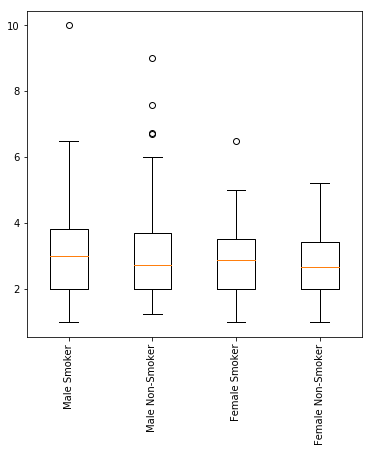

In [21]:
plt.xticks(rotation = 90)
d = []
l = []
for gender in ['Male','Female']:
    for isSmoker in ['Yes','No']:
        d.append(data.loc[(data['sex']==gender) & (data['smoker'] == isSmoker) , 'tip'])
        l.append(gender + ' '+ ('Non-' if isSmoker == 'No' else '') + 'Smoker')
        
plt.boxplot(d,labels=l)

## 练习4：泰坦尼克号海难幸存状况分析
* 载入数据集

In [22]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


* 不同仓位等级中幸存和遇难的乘客比例（堆积柱状图）

survived,0,1,total,die_prop,survived_prop
pclass,,,,,
1,80,136,216,0.370370,0.629630
2,97,87,184,0.527174,0.472826
3,372,119,491,0.757637,0.242363


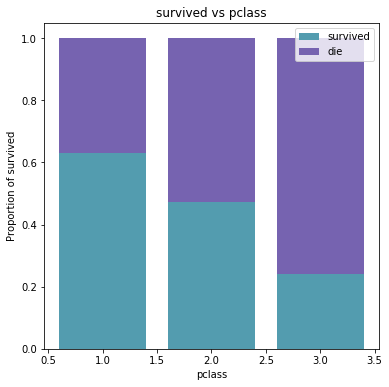

In [23]:
mean_by_reg_co_day = data[['pclass','survived']].groupby('pclass')['survived'].value_counts()
x= mean_by_reg_co_day.unstack()
x['total'] = x[0]+x[1]
x['die_prop'] = x[0]/x['total']
x['survived_prop'] = x[1]/x['total']

def stackedbarplot(x_data, y_data_list, y_data_names, colors, x_labels, y_labels, title):
    _,ax = plt.subplots()
    
    for i in range(0,len(y_data_list)):
        if i ==0:
            ax.bar(x_data,y_data_list[i],color = colors[i],align='center',label = y_data_names[i])
        else:
            ax.bar(x_data,y_data_list[i],color = colors[i], bottom = y_data_list[i-1], align = 'center', label = y_data_names[i])
            
    ax.set_ylabel(y_labels)
    ax.set_xlabel(x_labels)
    ax.set_title(title)
    ax.legend(loc = 'upper right')
    
stackedbarplot(x_data = x.index.values,
               y_data_list = [x['survived_prop'],x['die_prop']],
               y_data_names = ['survived','die'],
               colors = ['#539caf', '#7663b0'],
               x_labels = 'pclass',
               y_labels = 'Proportion of survived',
               title = 'survived vs pclass'
              )

x

In [24]:
y_data_list = [x['survived_prop'],x['die_prop'] ]
list(range(0, len(y_data_list)))

[0, 1]

* 不同性别的幸存比例（堆积柱状图）

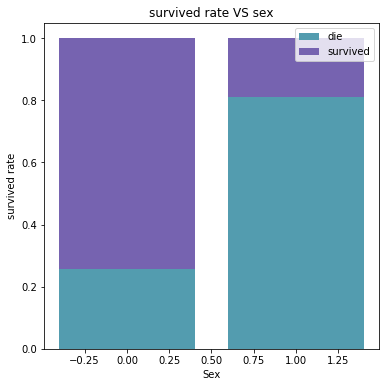

In [25]:
# 不同性别的幸存比例（堆积柱状图）
mean_by_reg_co_day = data[['sex', 'survived']].groupby('sex')['survived'].value_counts()
mean_by_reg_co_day = mean_by_reg_co_day.unstack()
mean_by_reg_co_day['total'] = mean_by_reg_co_day[0] + mean_by_reg_co_day[1]
mean_by_reg_co_day['die_prop'] = mean_by_reg_co_day[0] / mean_by_reg_co_day['total']
mean_by_reg_co_day['survived_prop'] = mean_by_reg_co_day[1] / mean_by_reg_co_day['total']
mean_by_reg_co_day

stackedbarplot(x_data = [0,1],
               y_data_list = [mean_by_reg_co_day['die_prop'], mean_by_reg_co_day['survived_prop']],
               y_data_names = ['die', 'survived'],
               colors = ['#539caf', '#7663b0'],
               x_labels = 'Sex',
               y_labels = 'survived rate',
               title = 'survived rate VS sex'
              )

* 幸存和遇难乘客的票价分布（分类箱式图）

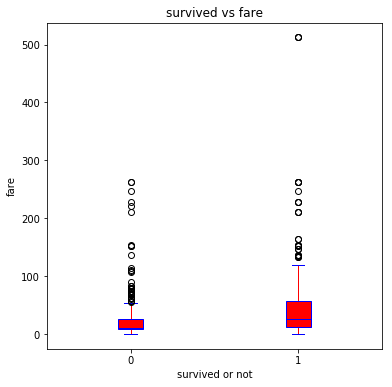

In [26]:
survive = data['survived'].unique()
survive_fare = []
for i in survive:
    survive_fare.append(data[data['survived'] == i]['fare'].values)

def boxplot(x_data,y_data, base_color, median_color,x_label,y_label, title):
    _,ax = plt.subplots()
    ax.boxplot(y_data,
              patch_artist = True,
              medianprops = {'color':base_color},
              boxprops ={'color': base_color, 'facecolor':median_color},
              whiskerprops = {'color':median_color},
              capprops = {'color':base_color})
    ax.set_xticklabels(x_data)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    
boxplot(x_data = survive,
       y_data = survive_fare,
       base_color='b',
       median_color='r',
       x_label='survived or not',
       y_label='fare',
       title = 'survived vs fare' )

* 幸存和遇难乘客的年龄分布（分类箱式图）

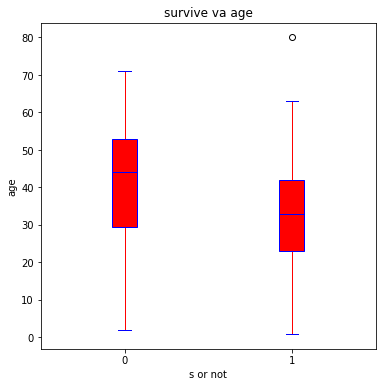

In [27]:
data_clear = data.dropna(axis = 0, how = 'any')
survives = data_clear['survived'].unique()
survives.sort()
ages_data = []
for survive in survives:
    ages_data.append(data_clear[data_clear['survived']==survive]['age'].values)
    
boxplot(x_data = survives,
       y_data = ages_data,
       base_color ='b',
       median_color = 'r',
       x_label = 's or not',
       y_label = 'age',
       title = 'survive va age')

* 不同上船港口的乘客仓位等级分布（分组柱状图）

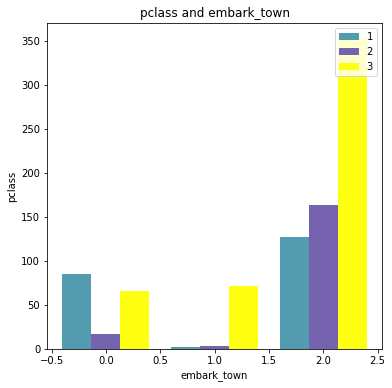

In [28]:
import numpy as np
def groupedbarplot(x_data,y_data_list, y_data_names, colors, x_label, y_label, title):
    _,ax = plt.subplots()
    total_width = 0.8
    
    ind_width = total_width/len(y_data_list)
    
    alteration = np.arange(-total_width/2+ind_width/2, total_width/2+ind_width/2, ind_width)
    
    for i in range(0,len(y_data_list)):
        ax.bar(x_data + alteration[i],y_data_list[i],color = colors[i], label = y_data_names[i], width = ind_width)
        
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right')
    
x = data.groupby('embark_town')['pclass'].value_counts()
x = x.unstack()

groupedbarplot(x_data=[0,1,2],
              y_data_list = [x[1],x[2],x[3]],
               y_data_names =['1','2','3'],
              colors = ['#539caf', '#7663b0','#ffff11']
               , x_label = 'embark_town'
               , y_label = 'pclass'
               , title = 'pclass and embark_town')
    

* 幸存和遇难乘客堂兄弟姐妹的数量分布（分类箱式图）

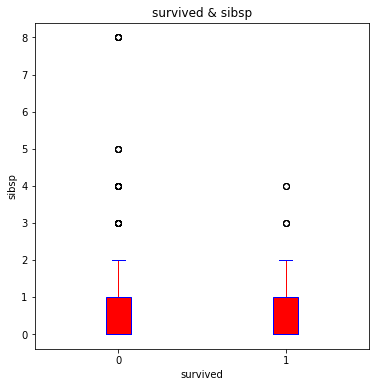

In [29]:
survived = np.unique(data['survived'])
bp_data = []
for day in survived:
    bp_data.append(data[data['survived'] == day]['sibsp'].values)
    
# 调用绘图函数
boxplot(x_data = survived
        , y_data = bp_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'survived'
        , y_label = 'sibsp'
        , title = 'survived & sibsp')   

* 幸存和遇难乘客父母子女的数量分布（分类箱式图）

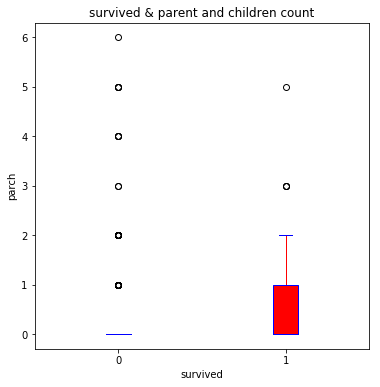

In [30]:
survived = np.unique(data['survived'])
bp_data = []
for day in survived:
    bp_data.append(data[data['survived'] == day]['parch'].values)
    
# 调用绘图函数
boxplot(x_data = survived
        , y_data = bp_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'survived'
        , y_label = 'parch'
        , title = 'survived & parent and children count')   

* 单独乘船与否和幸存之间有没有联系（堆积柱状图或者分组柱状图）

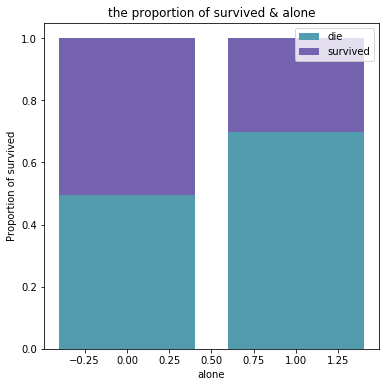

In [32]:
mean_by_reg_co_day = data[['alone', 'survived']].groupby('alone')['survived'].value_counts()
x = mean_by_reg_co_day.unstack()

x['total'] = x[0] + x[1]
x['die_prop'] = x[0] / x['total']
x['survived_prop'] = x[1] / x['total']



# 调用绘图函数
stackedbarplot(x_data = x.index.values
               , y_data_list = [x['die_prop'], x['survived_prop']]
               , y_data_names = ['die', 'survived']
               , colors = ['#539caf', '#7663b0']
               , x_labels = 'alone'
               , y_labels = 'Proportion of survived'
               , title = 'the proportion of survived & alone')